# How much food do we eat that contains sugar or salt?

### Loading the Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
import re,csv

In [5]:
import statsmodels.api as sm

In [6]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

In [7]:
from subprocess import check_output

### Loading the Data

In [8]:
food = pd.read_csv('FoodFacts.csv',low_memory=False)

In [9]:
food.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
0,000000000000012866,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1447004364,2015-11-08T17:39:24Z,1447004364,2015-11-08T17:39:24Z,Poêlée à la sarladaise,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000024600,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000036252,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1422221855,2015-01-25T21:37:35Z,Lion Peanut x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000039259,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1422221926,2015-01-25T21:38:46Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000039529,http://world-en.openfoodfacts.org/product/0000...,teolemon,1420147051,2015-01-01T21:17:31Z,1439141740,2015-08-09T17:35:40Z,Pack de 2 Twix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65503 entries, 0 to 65502
Columns: 159 entries, code to nutrition_score_uk_100g
dtypes: float64(103), object(56)
memory usage: 79.5+ MB


In [11]:
print(food.shape)

(65503, 159)


There are 65,503 rows and 159 columns in this dataset.

In [12]:
names=food.columns.values
print (names)

['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'product_name' 'generic_name' 'quantity'
 'packaging' 'packaging_tags' 'brands' 'brands_tags' 'categories'
 'categories_tags' 'categories_en' 'origins' 'origins_tags'
 'manufacturing_places' 'manufacturing_places_tags' 'labels' 'labels_tags'
 'labels_en' 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo'
 'cities' 'cities_tags' 'purchase_places' 'stores' 'countries'
 'countries_tags' 'countries_en' 'ingredients_text' 'allergens'
 'allergens_en' 'traces' 'traces_tags' 'traces_en' 'serving_size'
 'no_nutriments' 'additives_n' 'additives' 'additives_tags' 'additives_en'
 'ingredients_from_palm_oil_n' 'ingredients_from_palm_oil'
 'ingredients_from_palm_oil_tags' 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutrition_grade_uk'
 'nutrition_grade_fr' 'pnns_groups_1' 'pnns_groups_2' 'states'
 'states_tags' '

All the names and columns on this dataset.

In [13]:
food.corr()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy_from_fat_100g,fat_100g,...,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
no_nutriments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
additives_n,NaN,1.000000,0.237064,NaN,0.429515,NaN,NaN,0.042837,-0.099464,-0.023272,...,-0.210795,-0.566836,NaN,-0.300091,1.247390e-01,-0.165256,NaN,0.114729,0.223941,0.206875
ingredients_from_palm_oil_n,NaN,0.237064,1.000000,NaN,0.159999,NaN,NaN,0.226436,0.009806,0.109916,...,NaN,-0.664134,NaN,-0.057153,NaN,-0.343751,NaN,0.016860,0.260341,0.262894
ingredients_from_palm_oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingredients_that_may_be_from_palm_oil_n,NaN,0.429515,0.159999,NaN,1.000000,NaN,NaN,0.119373,0.145850,0.060256,...,-0.067478,-0.392108,NaN,-0.074685,NaN,-0.055246,NaN,-0.046673,0.147131,0.155705
ingredients_that_may_be_from_palm_oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nutrition_grade_uk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy_100g,NaN,0.042837,0.226436,NaN,0.119373,NaN,NaN,1.000000,0.766965,0.786976,...,-0.033392,-0.863846,NaN,0.107369,5.157476e-01,0.236590,NaN,0.030649,0.640764,0.708151
energy_from_fat_100g,NaN,-0.099464,0.009806,NaN,0.145850,NaN,NaN,0.766965,1.000000,0.973420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.577936,0.599559
fat_100g,NaN,-0.023272,0.109916,NaN,0.060256,NaN,NaN,0.786976,0.973420,1.000000,...,-0.108461,-0.828691,NaN,-0.195633,5.510292e-01,0.599391,NaN,-0.006072,0.579908,0.661461


# Checking for Null Values

In [14]:
food.isnull()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
0,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
5,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
6,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
7,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,True,True,True,True,True
9,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True


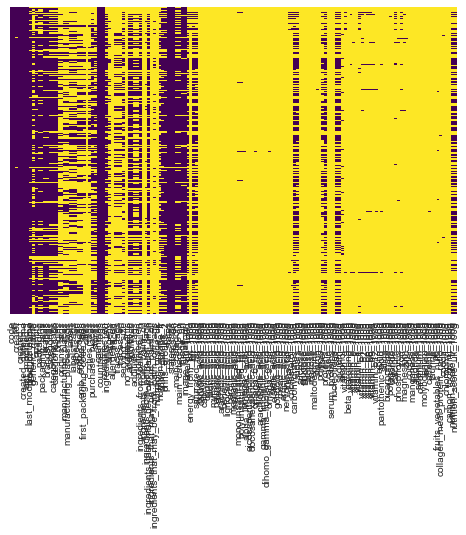

In [15]:
sns.heatmap(food.isnull(),yticklabels=False,cbar=False,cmap='viridis')

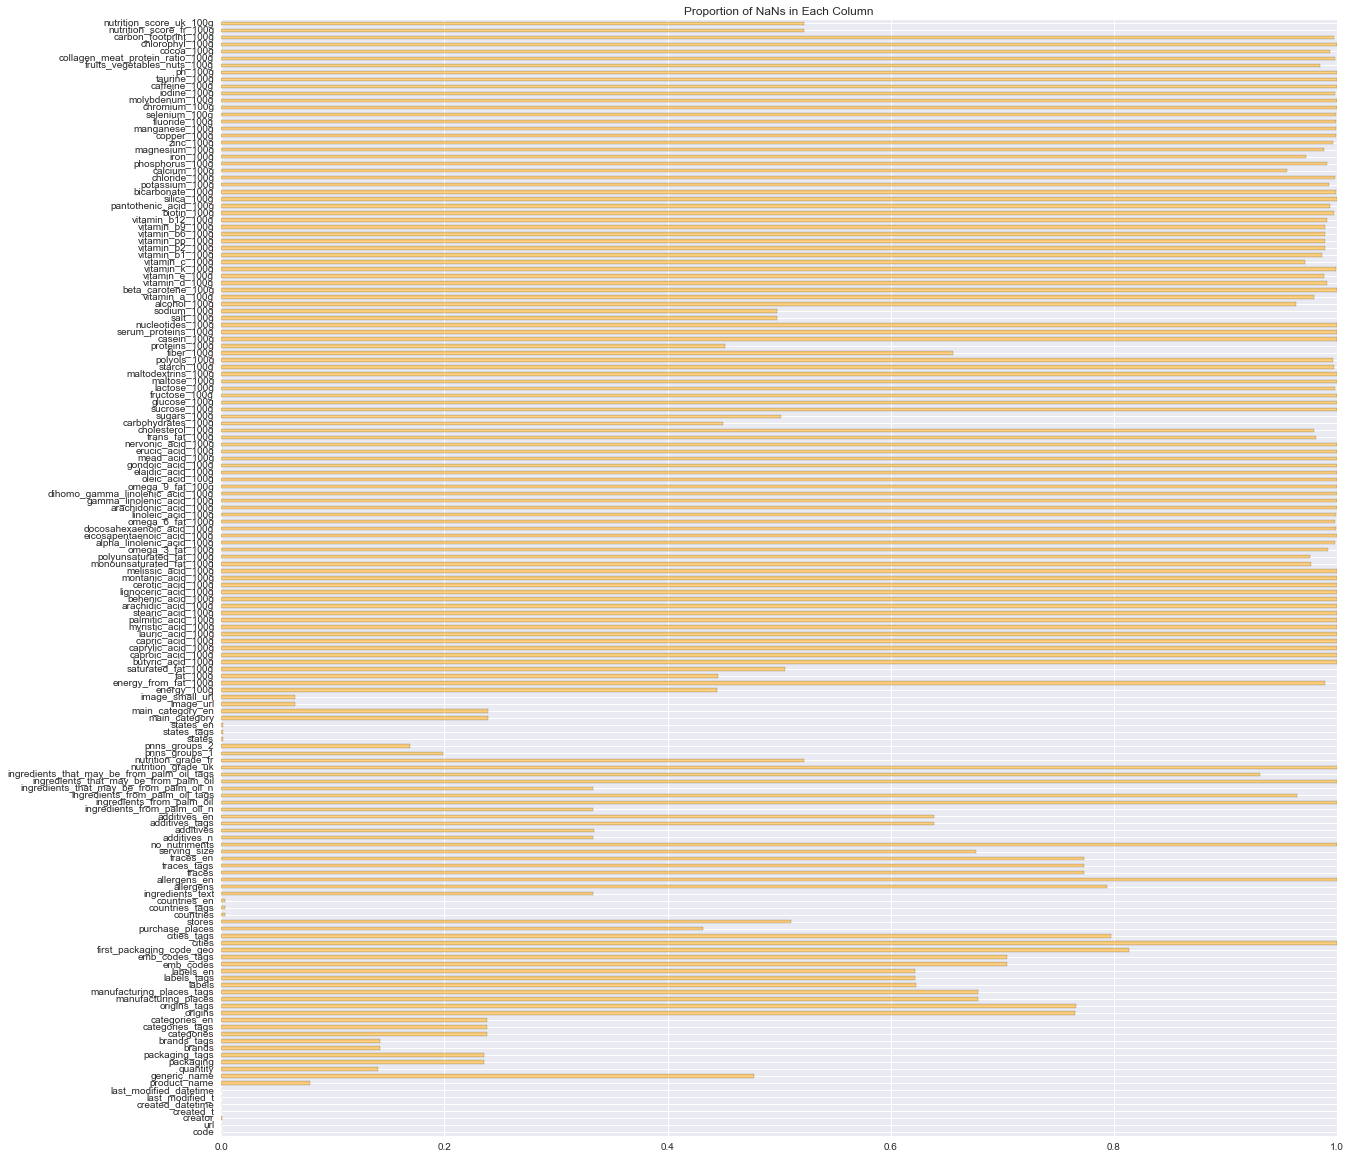

In [16]:
plt.figure(figsize=(20, 20))
food.isnull().mean(axis=0).plot.barh(color='orange',alpha=0.5)
plt.title("Proportion of NaNs in Each Column")

In [17]:
def no_null_objects(data, columns=None):
    """
    selects rows with no NaNs
    """
    if columns is None:
        columns = data.columns
    return data[np.logical_not(np.any(data[columns].isnull().values, axis=1))]

In [18]:
def splitDataFrameList(df, target_column, separator):

    def splitListToRows(row, row_accumulator, target_column, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df


### Countries Represented in the Dataset

In [19]:
food_countries = splitDataFrameList(no_null_objects(food, ["countries_en"]), "countries_en", ",")
countries = food_countries["countries_en"].value_counts()

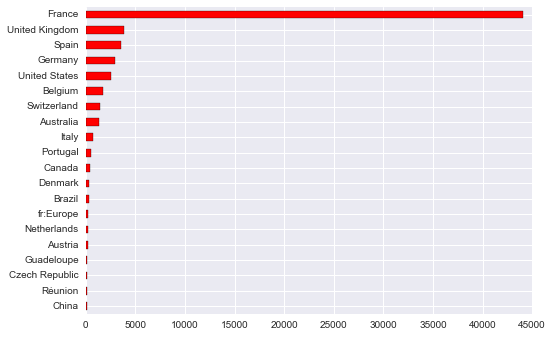

In [20]:
countries[:20][::-1].plot.barh(color='red')

### Countries that are too small for other countries

In [21]:
print(countries[20:].index)
print("Max count:", countries[20:].max())

Index(['Japan', 'Poland', 'Tunisia', 'French Guiana', 'Luxembourg', 'Morocco',
       'Russia', 'Algeria', 'New Zealand', 'Romania',
       ...
       'Republique-de-chine', 'Niger', 'Hawaii', 'Bangladesh', 'Maldives',
       'Irlande', 'Pakistan', 'Guatemala', 'An', 'Sri Lanka'],
      dtype='object', length=132)
Max count: 105


# Exports and Imports for Other Countries

In [22]:
countries_matrix = pd.DataFrame(np.zeros((20, 20)), countries[:20].index, countries[:20].index)
idxs = ~food.origins.isnull() & ~food.countries_en.isnull()
for from_, to_ in zip(food["origins"][idxs], food["countries_en"][idxs]):
    from_list = filter(lambda x: x in countries[:20].index, from_.split(","))
    to_list = filter(lambda x: x in countries[:20].index, to_.split(","))
    for from_c in from_list:
        for to_c in to_list:
            countries_matrix[from_c][to_c] += 1

#### Replace Non-Ascii Country Name

In [23]:
countries_matrix.columns = countries_matrix.columns[:-2].values.tolist() + ["Reunion"] + [countries_matrix.columns[-1]]
countries_matrix.index = countries_matrix.columns[:-2].values.tolist() + ["Reunion"] + [countries_matrix.columns[-1]]

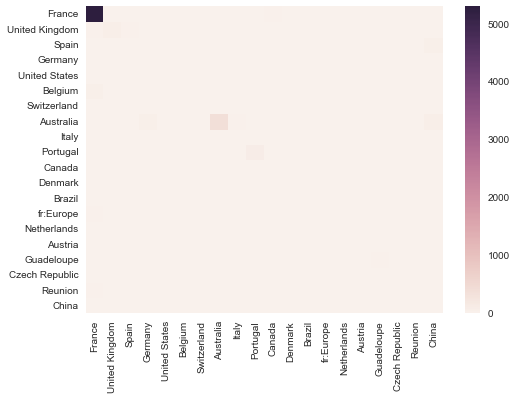

In [24]:
sns.heatmap(countries_matrix)

#### Removing France

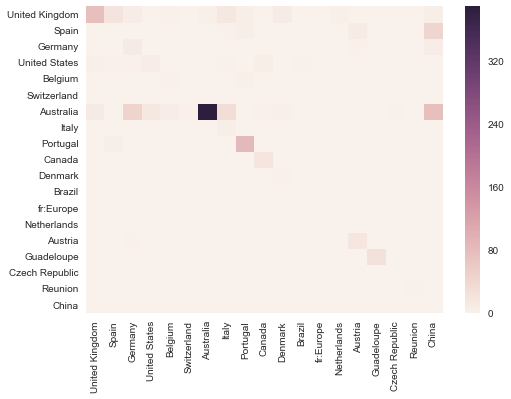

In [25]:
sns.heatmap(countries_matrix.drop(["France"], axis=0)
                .drop(["France"], axis=1))

#### Containing Palm Oil

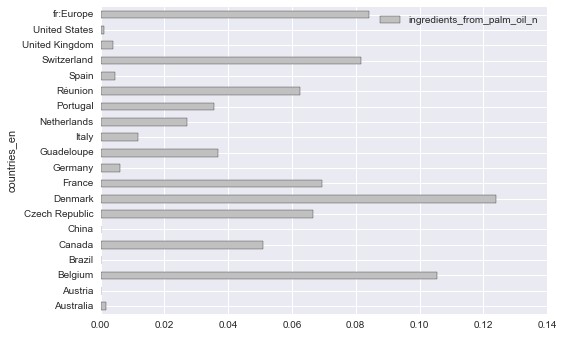

In [26]:
df = no_null_objects(food_countries[["countries_en", "ingredients_from_palm_oil_n"]])
df[df["countries_en"].isin(countries[:20].index)].groupby("countries_en").mean().plot.barh(color='silver')

European countries have a higher proportion of palm oil than the US, Brazil, Austria, and UK combined. Probably because of the null values?

C:\Users\atse\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


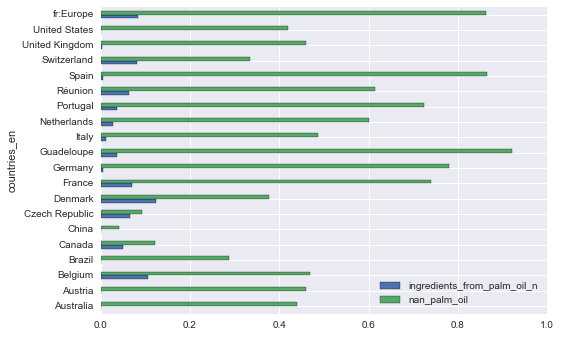

In [28]:
df = food_countries[["countries_en", "ingredients_from_palm_oil_n"]]
df["nan_palm_oil"] = ~ df["ingredients_from_palm_oil_n"].isnull()
df[df["countries_en"].isin(countries[:20].index)].groupby("countries_en").mean().plot.barh()

# Differences With Carbohydrates, Fat and Proteins

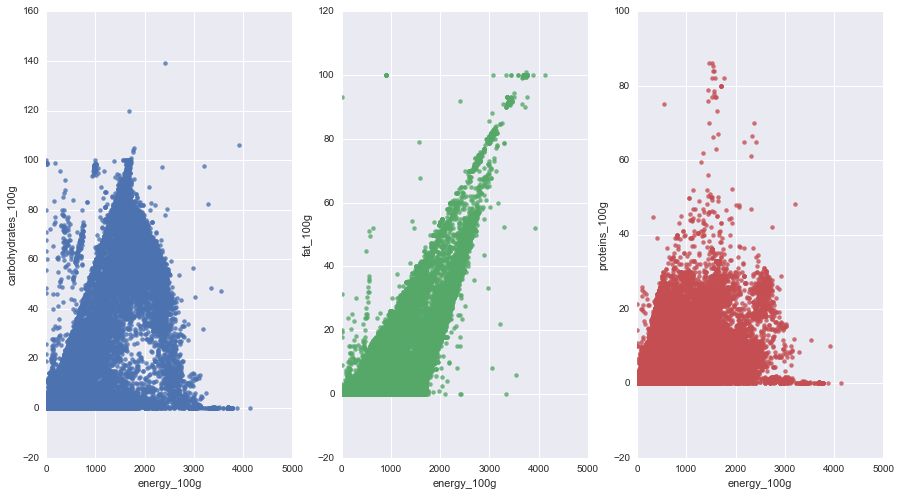

In [29]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = [15,8], sharex = True)
plt.xlim((0,5000))
plot_carbs = sns.regplot(x = "energy_100g", y = "carbohydrates_100g", fit_reg = False, ax = ax1, data = food)
plot_fat = sns.regplot(x = "energy_100g", y = "fat_100g", ax = ax2, fit_reg = False, data = food)
plot_protein = sns.regplot(x = "energy_100g", y = "proteins_100g", fit_reg = False, ax = ax3, data = food)

# Determining Alcohol Consumptions and Overview of Selected Countries

In [30]:
food_clean=food[food.product_name.notnull()]
food_clean=food_clean[food_clean.countries_en.notnull()]
alcohol=food_clean[food_clean.alcohol_100g.notnull()]

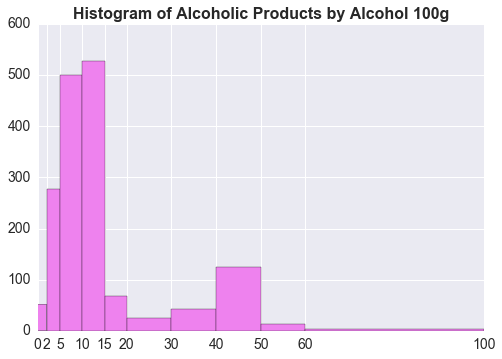

In [31]:
font = {'fontname':'Arial', 'size':'14'}
title_font = {'fontname':'Arial', 'weight' : 'bold','size':'16'}
alcohol=alcohol[alcohol.alcohol_100g>0]
plt.hist(alcohol.alcohol_100g, bins=[0,2,5,10, 15,20, 30, 40,50, 60,100],color='violet')
plt.xticks([0,2,5,10, 15,20, 30, 40,50, 60,100],**font)
plt.yticks(**font)
plt.title("Histogram of Alcoholic Products by Alcohol 100g",**title_font)
plt.show()

In [32]:
alcohol.countries_en.value_counts().head(10)

France            1105
United Kingdom     168
Germany             68
Belgium             47
United States       41
Spain               32
Portugal            19
Italy               16
Austria             13
Belgium,France       8
Name: countries_en, dtype: int64

In [33]:
countries=['France', 'United Kingdom', "Germany", "Belgium", "United States"]
alcohol=alcohol[alcohol.countries_en.isin(countries)]

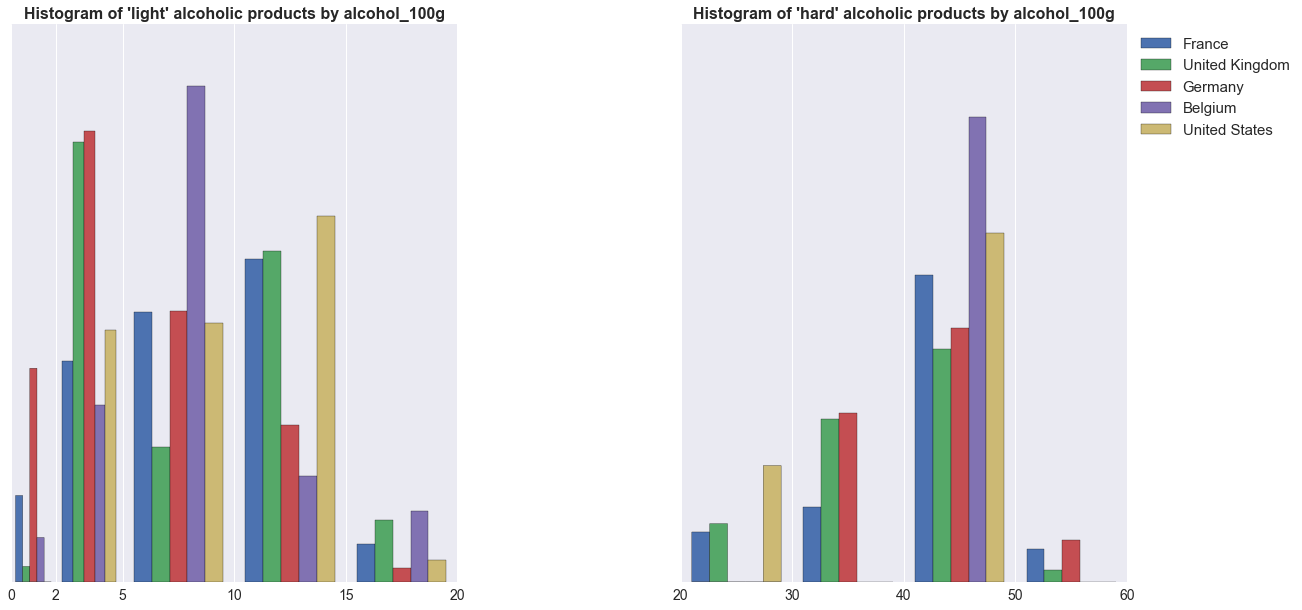

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.hist([alcohol.alcohol_100g[alcohol.countries_en=="France"],
          alcohol.alcohol_100g[alcohol.countries_en=="United Kingdom"],
          alcohol.alcohol_100g[alcohol.countries_en=="Germany"],
          alcohol.alcohol_100g[alcohol.countries_en=="Belgium"],
          alcohol.alcohol_100g[alcohol.countries_en=="United States"]],
         normed=True, bins=[0,2,5,10, 15,20]
        )
plt.xticks([0,2,5,10, 15,20],**font)
plt.yticks([])
plt.title("Histogram of 'light' alcoholic products by alcohol_100g",**title_font)
plt.subplot(1,2,2)
plt.hist([alcohol.alcohol_100g[alcohol.countries_en=="France"],
          alcohol.alcohol_100g[alcohol.countries_en=="United Kingdom"],
          alcohol.alcohol_100g[alcohol.countries_en=="Germany"],
          alcohol.alcohol_100g[alcohol.countries_en=="Belgium"],
          alcohol.alcohol_100g[alcohol.countries_en=="United States"]],
         normed=True, bins=[20,30,40, 50,60]
        )
plt.xticks([20,30,40,50,60],**font)
plt.yticks([])
plt.legend(countries, loc="upper left",bbox_to_anchor=(1,1),prop={'size':15})
plt.title("Histogram of 'hard' alcoholic products by alcohol_100g",**title_font)
plt.subplots_adjust(wspace=0.5)